# IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori

In [2]:
%%HTML
    <style type="text/css">
        table.dataframe td, table.dataframe th {
            border-style: solid;
        }
</style>

# READ DATA

In [3]:
df = pd.read_csv('DATA/bread basket.csv', sep=',')
print(df.shape)

(20507, 5)


In [4]:
df = df[['Transaction', 'date', 'period_day', 'Item']]
df = df.sample(n=300, random_state=7)
df.head()

,Transaction,date,period_day,Item
14768,7105,5,afternoon,Sandwich
8501,4280,4,morning,Pastry
8409,4232,4,morning,Bread
4885,2415,3,afternoon,Bread
12617,6217,5,afternoon,Bread


# FREQUENCY VISUALIZE

Text(0.5, 1.0, 'Best sellers')

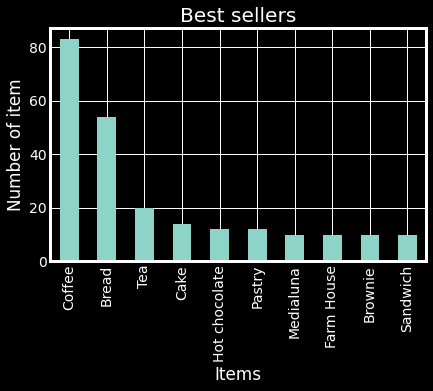

In [5]:
fig, ax=plt.subplots(figsize=(6,4))
df['Item'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel('Number of item')
plt.xlabel('Items')
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Best sellers')

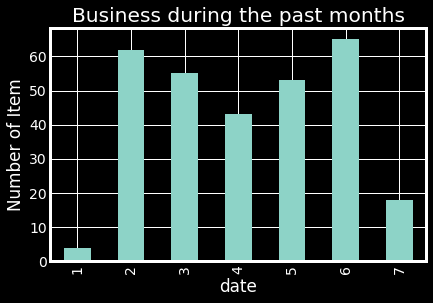

In [6]:
df.groupby('date')['Item'].count().plot(kind='bar')
plt.ylabel('Number of Item')
plt.title('Business during the past months')
plt.show()

In [7]:
A1 = list(df['Item'][df['date']==1])
A2 = list(df['Item'][df['date']==2])
A3 = list(df['Item'][df['date']==3])
A4 = list(df['Item'][df['date']==4])
A5 = list(df['Item'][df['date']==5])
A6 = list(df['Item'][df['date']==6])
A7 = list(df['Item'][df['date']==7])
data = [A1, A2, A3, A4, A5, A6, A7]

# DATA ENCODER

In [8]:
TA = TransactionEncoder()
data = TA.fit(data).transform(data)
data = pd.DataFrame(data, columns=TA.columns_)
print(data.shape)
data.head()

(7, 37)


,Alfajores,Bread,Brownie,Cake,Chicken Stew,Christmas common,Coffee,Coke,Cookies,Empanadas,...,Scandinavian,Scone,Soup,Spanish Brunch,Tea,Tiffin,Toast,Truffles,Tshirt,Vegan mincepie
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,True,True,True,True,False,False,True,False,True,True,...,True,False,True,False,True,False,False,False,False,False
2,True,True,True,True,False,False,True,False,True,False,...,True,False,False,False,True,False,True,False,False,True
3,False,True,True,True,True,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,True
4,False,True,True,True,True,False,True,False,True,False,...,False,True,True,True,True,False,True,True,True,True


In [9]:
data_freq = apriori(data, min_support=0.6, use_colnames=True)
data_freq.head(15)

,support,itemsets
0,1.000000,(Bread)
1,0.714286,(Brownie)
2,0.714286,(Cake)
3,0.857143,(Coffee)
4,1.000000,(Farm House)
5,0.857143,(Sandwich)
6,0.857143,(Tea)
7,0.714286,(Toast)
8,0.714286,"(Bread, Brownie)"
9,0.714286,"(Bread, Cake)"


# SELECT MULTI FEATURE 

In [10]:
data_freq['length'] = data_freq['itemsets'].apply(lambda x: len(x))
data_freq[ (data_freq['length'] == 2) &
(data_freq['support'] >= 0.8) ]

,support,itemsets,length
10,0.857143,"(Bread, Coffee)",2
11,1.000000,"(Bread, Farm House)",2
12,0.857143,"(Bread, Sandwich)",2
13,0.857143,"(Bread, Tea)",2
22,0.857143,"(Farm House, Coffee)",2
23,0.857143,"(Sandwich, Coffee)",2
26,0.857143,"(Farm House, Sandwich)",2
27,0.857143,"(Farm House, Tea)",2


# ASSOCIATION RULES

In [11]:
association_rules(data_freq, metric="confidence", min_threshold=0.7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bread),(Brownie),1.000000,0.714286,0.714286,0.714286,1.000000,0.000000,1.000000
1,(Brownie),(Bread),0.714286,1.000000,0.714286,1.000000,1.000000,0.000000,inf
2,(Bread),(Cake),1.000000,0.714286,0.714286,0.714286,1.000000,0.000000,1.000000
3,(Cake),(Bread),0.714286,1.000000,0.714286,1.000000,1.000000,0.000000,inf
4,(Bread),(Coffee),1.000000,0.857143,0.857143,0.857143,1.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...
857,(Sandwich),"(Farm House, Coffee, Bread, Tea, Cake)",0.857143,0.714286,0.714286,0.833333,1.166667,0.102041,1.714286
858,(Coffee),"(Farm House, Sandwich, Bread, Tea, Cake)",0.857143,0.714286,0.714286,0.833333,1.166667,0.102041,1.714286
859,(Bread),"(Farm House, Sandwich, Coffee, Tea, Cake)",1.000000,0.714286,0.714286,0.714286,1.000000,0.000000,1.000000
860,(Tea),"(Farm House, Sandwich, Coffee, Bread, Cake)",0.857143,0.714286,0.714286,0.833333,1.166667,0.102041,1.714286


In [12]:
rules = association_rules(data_freq, metric="lift", min_threshold=1.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Tea, Coffee)",(Cake),0.714286,0.714286,0.714286,1.0,1.4,0.204082,inf
1,(Cake),"(Tea, Coffee)",0.714286,0.714286,0.714286,1.0,1.4,0.204082,inf
2,"(Tea, Sandwich)",(Cake),0.714286,0.714286,0.714286,1.0,1.4,0.204082,inf
3,(Cake),"(Tea, Sandwich)",0.714286,0.714286,0.714286,1.0,1.4,0.204082,inf
4,"(Bread, Tea, Coffee)",(Cake),0.714286,0.714286,0.714286,1.0,1.4,0.204082,inf
...,...,...,...,...,...,...,...,...,...
85,"(Sandwich, Cake)","(Farm House, Bread, Tea, Coffee)",0.714286,0.714286,0.714286,1.0,1.4,0.204082,inf
86,"(Tea, Coffee)","(Farm House, Bread, Sandwich, Cake)",0.714286,0.714286,0.714286,1.0,1.4,0.204082,inf
87,"(Cake, Coffee)","(Farm House, Bread, Sandwich, Tea)",0.714286,0.714286,0.714286,1.0,1.4,0.204082,inf
88,"(Bread, Cake)","(Farm House, Sandwich, Tea, Coffee)",0.714286,0.714286,0.714286,1.0,1.4,0.204082,inf


In [13]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,"(Tea, Coffee)",(Cake),0.714286,0.714286,0.714286,1.0,1.4,0.204082,inf,2
1,(Cake),"(Tea, Coffee)",0.714286,0.714286,0.714286,1.0,1.4,0.204082,inf,1
2,"(Tea, Sandwich)",(Cake),0.714286,0.714286,0.714286,1.0,1.4,0.204082,inf,2
3,(Cake),"(Tea, Sandwich)",0.714286,0.714286,0.714286,1.0,1.4,0.204082,inf,1
4,"(Bread, Tea, Coffee)",(Cake),0.714286,0.714286,0.714286,1.0,1.4,0.204082,inf,3
...,...,...,...,...,...,...,...,...,...,...
85,"(Sandwich, Cake)","(Farm House, Bread, Tea, Coffee)",0.714286,0.714286,0.714286,1.0,1.4,0.204082,inf,2
86,"(Tea, Coffee)","(Farm House, Bread, Sandwich, Cake)",0.714286,0.714286,0.714286,1.0,1.4,0.204082,inf,2
87,"(Cake, Coffee)","(Farm House, Bread, Sandwich, Tea)",0.714286,0.714286,0.714286,1.0,1.4,0.204082,inf,2
88,"(Bread, Cake)","(Farm House, Sandwich, Tea, Coffee)",0.714286,0.714286,0.714286,1.0,1.4,0.204082,inf,2


In [14]:
rules[ (rules['antecedent_len'] >= 2) &
       (rules['confidence'] > 0.75) &
       (rules['lift'] > 1.2) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,"(Tea, Coffee)",(Cake),0.714286,0.714286,0.714286,1.0,1.4,0.204082,inf,2
2,"(Tea, Sandwich)",(Cake),0.714286,0.714286,0.714286,1.0,1.4,0.204082,inf,2
4,"(Bread, Tea, Coffee)",(Cake),0.714286,0.714286,0.714286,1.0,1.4,0.204082,inf,3
5,"(Bread, Cake)","(Tea, Coffee)",0.714286,0.714286,0.714286,1.0,1.4,0.204082,inf,2
6,"(Tea, Coffee)","(Bread, Cake)",0.714286,0.714286,0.714286,1.0,1.4,0.204082,inf,2
...,...,...,...,...,...,...,...,...,...,...
84,"(Tea, Sandwich)","(Farm House, Bread, Cake, Coffee)",0.714286,0.714286,0.714286,1.0,1.4,0.204082,inf,2
85,"(Sandwich, Cake)","(Farm House, Bread, Tea, Coffee)",0.714286,0.714286,0.714286,1.0,1.4,0.204082,inf,2
86,"(Tea, Coffee)","(Farm House, Bread, Sandwich, Cake)",0.714286,0.714286,0.714286,1.0,1.4,0.204082,inf,2
87,"(Cake, Coffee)","(Farm House, Bread, Sandwich, Tea)",0.714286,0.714286,0.714286,1.0,1.4,0.204082,inf,2


# NEW SUBSET

In [15]:
A1 = list(df['Item'][df['period_day']=='morning'])
A2 = list(df['Item'][df['period_day']=='afternoon'])
A3 = list(df['Item'][df['period_day']=='evening'])
data = [A1, A2, A3]

In [16]:
TA = TransactionEncoder()
data = TA.fit(data).transform(data)
data = pd.DataFrame(data, columns=TA.columns_)
print(data.shape)
data.head()

(3, 37)


,Alfajores,Bread,Brownie,Cake,Chicken Stew,Christmas common,Coffee,Coke,Cookies,Empanadas,...,Scandinavian,Scone,Soup,Spanish Brunch,Tea,Tiffin,Toast,Truffles,Tshirt,Vegan mincepie
0,False,True,True,True,False,False,True,False,True,False,...,False,False,False,True,True,True,True,False,False,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,False,True,False,True,True,False,True
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False


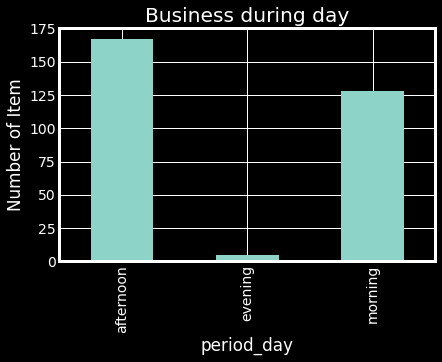

In [17]:
df.groupby('period_day')['Item'].count().plot(kind='bar')
plt.ylabel('Number of Item')
plt.title('Business during day')
plt.show()

In [18]:
data_freq = apriori(data, min_support=0.6, use_colnames=True)
data_freq.head(15)

,support,itemsets
0,0.666667,(Bread)
1,0.666667,(Brownie)
2,0.666667,(Cake)
3,1.000000,(Coffee)
4,0.666667,(Cookies)
5,0.666667,(Farm House)
6,1.000000,(Hot chocolate)
7,0.666667,(Jam)
8,1.000000,(Medialuna)
9,0.666667,(Mineral water)


In [19]:
data_freq['length'] = data_freq['itemsets'].apply(lambda x: len(x))
data_freq[ (data_freq['length'] == 2) &
(data_freq['support'] >= 0.8) ]

,support,itemsets,length
57,1.0,"(Hot chocolate, Coffee)",2
59,1.0,"(Medialuna, Coffee)",2
87,1.0,"(Medialuna, Hot chocolate)",2


In [20]:
data_freq['length'] = data_freq['itemsets'].apply(lambda x: len(x))
data_freq[ (data_freq['length'] == 3) &
(data_freq['support'] >= 0.8) ]

,support,itemsets,length
379,1.0,"(Medialuna, Hot chocolate, Coffee)",3
